# Task 2 - False Color Image 

Date: 2024-11-23

Author: Jordan Sibley 

[Github Repository](https://github.com/jordancsibley/eds220-hwk4)

## Data

The data used to create the false color image of the Thomas fire is Landsat data and fire perimeter data. The Landsat Collection 2 Level-2 data is a simplifed collection of bands collected from the an atmosphereic satellite. The fire perimeter data is a subset of a CAL FIRE geodatabase that contains only the geometries for the Thomas Fire. 

In [11]:
# Import libraries 
import pandas as pd 
import numpy as np
import geopandas as gpd 
import os 
import rioxarray as rioxr
import xarray as xr
import matplotlib.pyplot as plt

# Set environment variable
os.environ['PROJ_LIB'] = '/opt/anaconda3/share/proj'

ASK IF I SHOULD BE PUTTING LANDSAT DATA IN THE DATA FOLDER OR NOT

In [2]:
# File path to data on workbench 
fp = os.path.join("/courses/EDS220/data/hwk4_landsat_data/landsat8-2018-01-26-sb-simplified.nc")
landsat = rioxr.open_rasterio(fp)

In [3]:
# Explore landsat data 
landsat 

<xarray.Dataset> Size: 25MB
Dimensions:      (band: 1, x: 870, y: 731)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0
Data variables:
    red          (band, y, x) float64 5MB ...
    green        (band, y, x) float64 5MB ...
    blue         (band, y, x) float64 5MB ...
    nir08        (band, y, x) float64 5MB ...
    swir22       (band, y, x) float64 5MB ...

The landsat data is an xarray that contains the band information. The dimensions are x and y and also band that just contains the interger 1. This dimension is likely not useful and will likely be dropped. The data variables of the xarray are the band types which are red, green, blue, near infrared (nir08), and the shortwave infrared (swir22). 

In [4]:
# Drop the `band` dimension of the data and remove dims of length 1 
landsat = landsat.drop_vars('band').squeeze()

# View altered landsat data 
landsat

<xarray.Dataset> Size: 25MB
Dimensions:      (x: 870, y: 731)
Coordinates:
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0
Data variables:
    red          (y, x) float64 5MB ...
    green        (y, x) float64 5MB ...
    blue         (y, x) float64 5MB ...
    nir08        (y, x) float64 5MB ...
    swir22       (y, x) float64 5MB ...

TypeError: Invalid shape (3, 731, 870) for image data

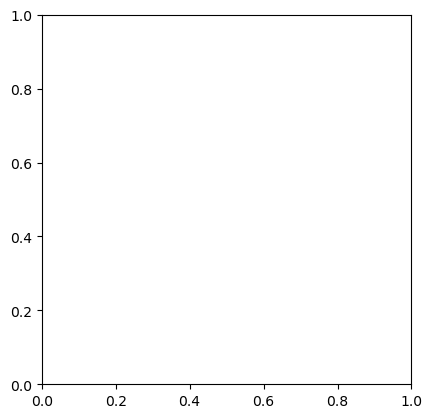

In [9]:
# Select r, g, b bands and convert to array 
#plt.imshow(
#    landsat[['red', 'green', 'blue']].to_array().values.transpose(1, 2, 0)
#)

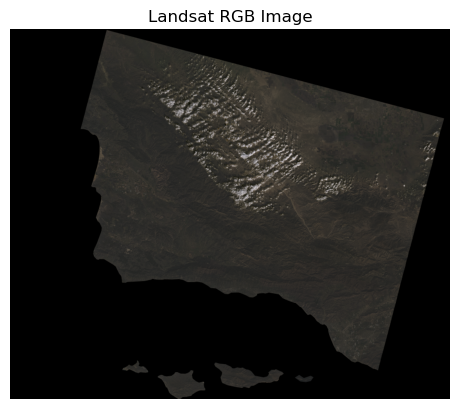

In [18]:
# This works, but I don't think this is what they want 


rgb = landsat[['red', 'green', 'blue']].to_array().values

# Move bands to the last dimension
rgb = np.moveaxis(rgb, 0, -1)  # Rearrange (variable, y, x) -> (y, x, variable)

# Adjust the scale 
rgb = rgb / np.max(rgb)

# Plot the RGB image
plt.imshow(rgb)  # No transpose needed now
plt.title("Landsat RGB Image")
plt.axis('off')
plt.show()